In [1]:
import pandas as pd
data = pd.read_csv("D:\TAMUC\Sem 2\Business Analytics Programming\Project\cancer.csv")

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


# Question 1.a

In [4]:
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
The year, Auxillary nodes and Survival are very close to the mean whereas the age is a bit far away from the mean

# Question 1.b

In [8]:
corr = data.corr()

corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


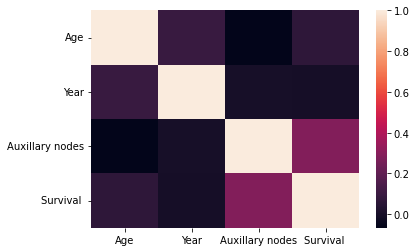

In [11]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

plt.show()

There is a positive correlation between Year, Survival and age and negative correlation between Auxillary nodes and Age
There is a negative correlation between Year and Auxillary nodes, Survival
There is a negative correlation between Auxillary nodes and Age, Year and positive correlation between Auxillary nodes and Survival
There is a positive correlation between Survival and Age, Auxillary nodes and negative correlation between Survival and year

# Question 1.c

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

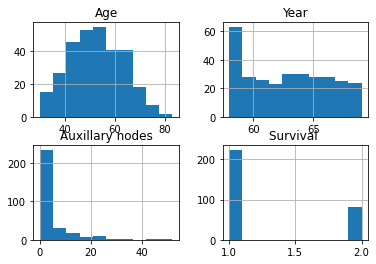

In [12]:
data.hist()

Auxillary nodes are completely skewed towards left side and Age is slightly skewed towards left side

# Question 2.a

In [14]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [24]:
data = pd.read_csv("D:\TAMUC\Sem 2\Business Analytics Programming\Project\cancer.csv")
# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.7)

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


              precision    recall  f1-score   support

           1       0.80      0.97      0.88        72
           2       0.60      0.15      0.24        20

    accuracy                           0.79        92
   macro avg       0.70      0.56      0.56        92
weighted avg       0.76      0.79      0.74        92



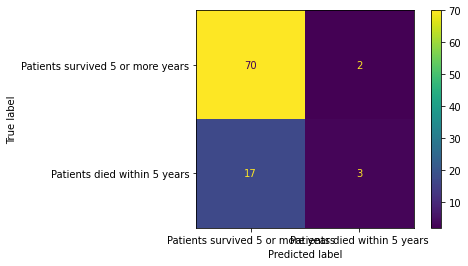

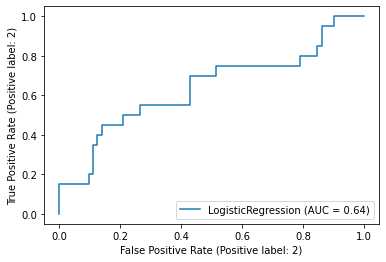

In [26]:

clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
labels = ["Patients survived 5 or more years", "Patients died within 5 years"]
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
print(classification_report(y_test, y_pred, labels = clf.classes_))
plot_roc_curve(clf, X_test, y_test) 
plt.show()

# Question 2.b

              precision    recall  f1-score   support

           1       0.82      0.93      0.87        72
           2       0.50      0.25      0.33        20

    accuracy                           0.78        92
   macro avg       0.66      0.59      0.60        92
weighted avg       0.75      0.78      0.75        92



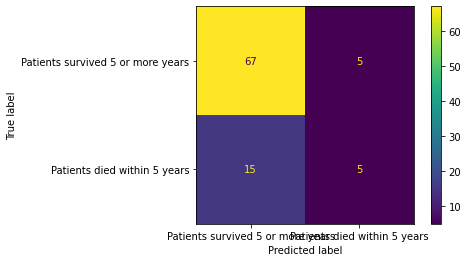

In [29]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

# Question 2.c

              precision    recall  f1-score   support

           1       0.80      0.97      0.88        72
           2       0.50      0.10      0.17        20

    accuracy                           0.78        92
   macro avg       0.65      0.54      0.52        92
weighted avg       0.73      0.78      0.72        92



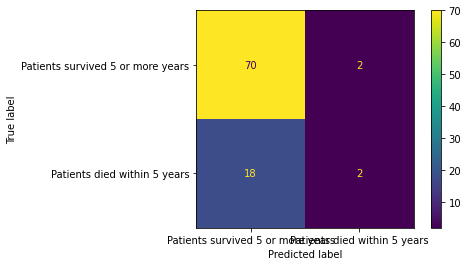

In [30]:
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

# Question 2.d

              precision    recall  f1-score   support

           1       0.81      0.88      0.84        72
           2       0.36      0.25      0.29        20

    accuracy                           0.74        92
   macro avg       0.58      0.56      0.57        92
weighted avg       0.71      0.74      0.72        92



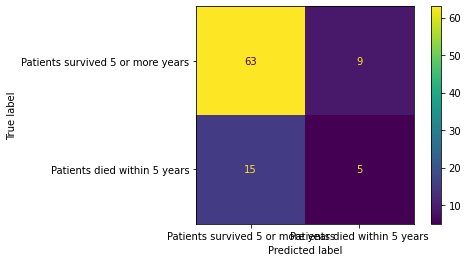

In [31]:
nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

In [32]:
# Use 10 - fold cross validation
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.7727272727272727
Accuracy for iteration 2 is 0.6818181818181818
Accuracy for iteration 3 is 0.8636363636363636
Accuracy for iteration 4 is 0.5714285714285714
Accuracy for iteration 5 is 0.7142857142857143
Accuracy for iteration 6 is 0.7142857142857143
Accuracy for iteration 7 is 0.7619047619047619
Accuracy for iteration 8 is 0.7619047619047619
Accuracy for iteration 9 is 0.7619047619047619
Accuracy for iteration 10 is 0.6190476190476191


In [33]:
# Use GridSearchCV for searching through hyper parameters
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'poly'}